In [99]:
# The regression is still referred to as linear as the coefficients are still linear

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [101]:
# importing data
data = pd.read_csv(r"C:\Users\Maria Munir Stokes\Documents\DS Courses\Udemy\drive-download-20200629T190417Z-001\Part 2 - Regression\Section 6 - Polynomial Regression\Python\Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [102]:
# splitting the data between dependent and independent
# converting to numpy arrays

x = data.iloc[:,1].values
y = data.iloc[:,-1].values

# experimenting with the numpy concatenation 
print(np.concatenate((x.reshape(len(x),1),y.reshape(len(y),1)),1))

# the fit command requires a 2D array, but currently x and y are 1D
print(x.shape)
print(y.shape)

# reshaping them allows to convert to 2D
# -1 keeps all of the dimension in place and 1 adds a new dimension

x = x.reshape(-1,1)
y = y.reshape(-1,1)
print("x:", x.shape)
print(x)

[[      1   45000]
 [      2   50000]
 [      3   60000]
 [      4   80000]
 [      5  110000]
 [      6  150000]
 [      7  200000]
 [      8  300000]
 [      9  500000]
 [     10 1000000]]
(10,)
(10,)
x: (10, 1)
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


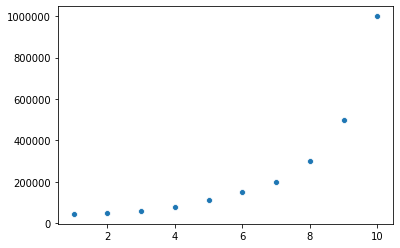

In [103]:
# as there is such a small amount of data available, using all of the data
# for training is better than setting aside some data for testing

# plotting the data
# as they were converted into 2D arrays, need to specify which part is needed
ax = sns.scatterplot(x[:,0], y[:,0])

Text(0, 0.5, 'Salary')

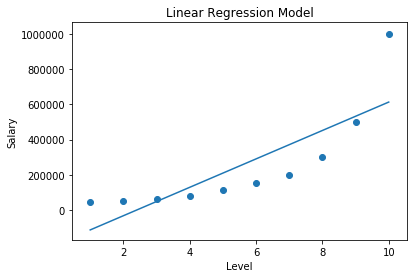

In [104]:
# training the linear regression model
# creating an instance of the class

linear_regressor = LinearRegression()
linear_regressor.fit(x,y)

predictions = linear_regressor.predict(x)
plt.plot(x[:,0],predictions)
plt.scatter(x[:,0], y[:,0])
plt.title('Linear Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')
# this plot shows the linear relationship between the two variables
# which obviously does not fit the model

In [105]:
# working out the polynomial features
# up to (x1)^2
poly_reg = PolynomialFeatures(degree = 4)

# transform the origin value: Label into the features needed
# for our equation (x1, x1^2)
x_poly = poly_reg.fit_transform(x)
print(x_poly)


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


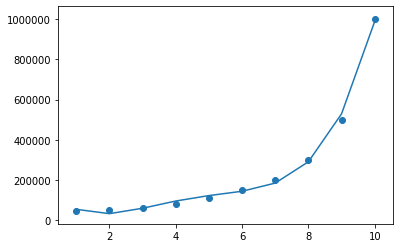

In [106]:
# retrain the linear regression for the x_poly values
lin_poly_regressor = LinearRegression()
lin_poly_regressor.fit(x_poly,y)
poly_predict = lin_poly_regressor.predict(x_poly)
plt.plot(x,poly_predict)
plt.scatter(x,y)




In [107]:
# changing the value of the degree allows to adjust the fit

In [108]:
# linear
# predicting new results for a specific value
# using double square brackets converts it to an array from a single value
linear_regressor.predict([[6.5]])

array([[330378.78787879]])

In [109]:
# poly
# the input for this needs to be (6.5, 6.5^2, 6.5^3)
# so the poly transformation needs to be used in order to convert 6.5 to this
sixpoint5 = lin_poly_regressor.predict(poly_reg.fit_transform([[6.5]]))

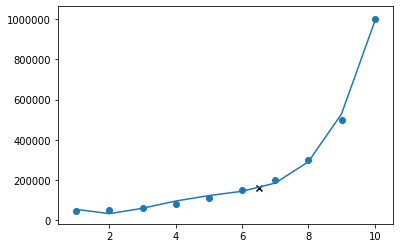

In [113]:
lin_poly_regressor = LinearRegression()
lin_poly_regressor.fit(x_poly,y)
poly_predict = lin_poly_regressor.predict(x_poly)
plt.plot(x,poly_predict)
plt.scatter(x,y)
plt.scatter(6.5, sixpoint5, marker = 'x', color = 'black')